In [ ]:
# 참조 : https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

+ [ ] 0.Data & check
+ [ ] 1.distribution(boxplot)
+ [ ] 2.DBScan Clustering
+ [ ] 3.Isolation Forest
+ [ ] 4.RandomForest(Robust)

1. 전체 추이
  + 최근 90일 : anormaly detect 적용
2. 주요 체널별 추이
  + 정회원
  + 카카오싱크

3. 관계사별 추이 
  + Maeil Do
  + maeili
  + 0to7
  + 폴 바셋
  + 상하농원


In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import cx_Oracle as oci
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)

### 0.Data & check

In [2]:
# 접속정보
con_text = open("C:/conn_info.txt", 'r', encoding='utf8')
con_text = con_text.read()

# DB 접속
conn = oci.connect(con_text)

In [28]:
## 최근 90일 회원가입자 수
sql_test = '''select trunc(reg_dtm) as reg_dmt, count(*) as cnt 
              from tm_mmb_info 
              where reg_dtm between sysdate -366 and sysdate-1 
              group by trunc(reg_dtm) '''

df1_test = pd.read_sql(sql_test , con = conn)

sql_real = '''select trunc(reg_dtm) as reg_dmt, count(*) as cnt 
              from tm_mmb_info 
              where reg_dtm between sysdate - 91 and sysdate-1 
              group by trunc(reg_dtm) '''

df1_real = pd.read_sql(sql_real , con = conn)

In [29]:
sql2_r = '''select trunc(reg_dtm) as reg_dtm, count(*) as cnt, 'regular' as gubun
            from tm_mmb_info
            where reg_dtm between sysdate - 91 and sysdate-1
            and soc_mmb_yn='N' and mmb_st_cd = '1'
            group by trunc(reg_dtm)
            '''

sql2_s = '''select trunc(reg_dtm) as reg_dtm, count(*) as cnt, 'kakao_scyn' as gubun
            from tm_mmb_kakao_sync
            where reg_dtm between sysdate - 91 and sysdate-1
            group by trunc(reg_dtm)
            order by trunc(reg_dtm)
            '''

df2_regular = pd.read_sql(sql2_r, con = conn)
df2_social  = pd.read_sql(sql2_s, con = conn)


In [30]:
df2 = pd.concat([df2_regular, df2_social])

### 1.전체 추이

In [33]:
data_test = np.array(df1_test.CNT).reshape(-1,1)
data_real = np.array(df1_real.CNT).reshape(-1,1)

# clf = IsolationForest()
clf = LocalOutlierFactor()
model = clf.fit(data_test)
result = model.fit_predict(data_real)
result = result.tolist()

In [34]:
df1_real['color'] = result
df1_real['color'] = df1_real['color'].replace({-1: 'red', 1: 'blue'})

In [35]:
df3 = pd.pivot_table(df2, values='CNT', index=['GUBUN'],columns=['REG_DTM'],  aggfunc='sum')

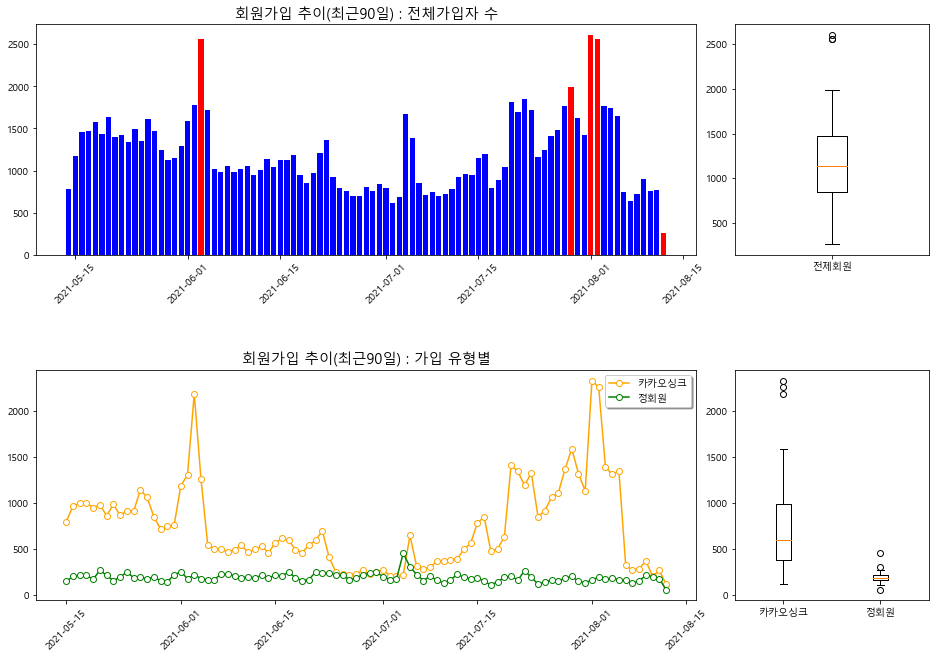

In [36]:
plt.figure(figsize=(16, 10))

ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=3)
plt.bar(df1_real.REG_DMT, df1_real.CNT, color = df1_real.color)
plt.xticks(rotation=45)
plt.title('회원가입 추이(최근90일) : 전체가입자 수',fontsize='x-large')

ax2 = plt.subplot2grid((2, 4), (0, 3))
plt.boxplot(df1_real.CNT, labels=['전제회원'])


ax3 = plt.subplot2grid((2, 4), (1, 0), colspan=3)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.plot(df3.iloc[[0]].T[1:],  marker="o", color = 'orange', markerfacecolor='w', label='카카오싱크')
plt.plot(df3.iloc[[1]].T[1:],  marker="o", color = 'green',  markerfacecolor='w', label='정회원')
lgd = plt.legend(loc='best', fancybox=True, shadow=True)
plt.xticks(rotation=45)
plt.title('회원가입 추이(최근90일) : 가입 유형별',fontsize='x-large')

ax4 = plt.subplot2grid((2, 4), (1, 3))
plt.boxplot(df3, labels=['카카오싱크', '정회원'])

plt.show()

### 2.주요체널 추이

In [18]:
# df2.head(2)

In [84]:
# ci = 1.96 * np.std(df.CNT)/np.mean(df.CNT)

# fig, ax = plt.subplots(1, 2, 2)
# ax.plot(df.CNT)
# ax.fill_between( (df.CNT-ci), (df.CNT+ci), color='b', alpha=.1)
# plt.show()

In [85]:
# from sklearn import svm
# from sklearn.datasets import make_moons, make_blobs
# from sklearn.covariance import EllipticEnvelope
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor

# outliers_fraction = 0.15

# # define outlier/anomaly detection methods to be compared
# anomaly_algorithms = [ ("Robust covariance",   EllipticEnvelope(contamination=outliers_fraction)),
#                        ("One-Class SVM",       svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",gamma=0.1)),
#                        ("Isolation Forest",    IsolationForest(behaviour='new', contamination=outliers_fraction, random_state=42)),
#                        ("Local Outlier Factor",LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction))
#                      ]

In [86]:
# for i_dataset, X in enumerate(datasets):
#     # Add outliers
#     X = np.concatenate([X, rng.uniform(low=-6, high=6,
#                        size=(n_outliers, 2))], axis=0)

#     for name, algorithm in anomaly_algorithms:
#         t0 = time.time()
#         algorithm.fit(X)
#         t1 = time.time()
#         plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
#         if i_dataset == 0:
#             plt.title(name, size=18)

#         # fit the data and tag outliers
#         if name == "Local Outlier Factor":
#             y_pred = algorithm.fit_predict(X)
#         else:
#             y_pred = algorithm.fit(X).predict(X)

#         # plot the levels lines and the points
#         if name != "Local Outlier Factor":  # LOF does not implement predict
#             Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
#             Z = Z.reshape(xx.shape)
#             plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

#         colors = np.array(['#377eb8', '#ff7f00'])
#         plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

#         plt.xlim(-7, 7)
#         plt.ylim(-7, 7)
#         plt.xticks(())
#         plt.yticks(())
#         plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
#                  transform=plt.gca().transAxes, size=15,
#                  horizontalalignment='right')
#         plot_num += 1

In [12]:
X = df.CNT.to_numpy()

In [13]:
X_test = X[-1].reshape(1, -1)
X_train = X[:-2].reshape(1, -1)

In [14]:
# IsolationForest

clf = IsolationForest()
result = clf.fit(X_train)
result = result.fit_predict(X_train)

# if result[0] == 1:
#     print('이상치 있음')
# else:
#     print('이상치 없음')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:475: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


In [15]:
result

array([1])

In [26]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(X)

# total number of noisy points
result2 = list(clusters).count(-1)
if result2 > 0:
    print('이상치 있음')
#     print('이상치 겟수 : {}'.format(result2) )

이상치 있음


In [73]:
# from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors
# clf = LocalOutlierFactor(n_neighbors=2)
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X)

NearestNeighbors(n_neighbors=1)

In [17]:
clf.fit_predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[1698 3200 1931 1414 1228 1147  934 1101 1173 1462 1467 1572 1433 1638
 1396 1423 1337 1496 1355 1607 1469 1250 1132 1150 1296 1587 1775 2557
 1723 1018  979 1057  985 1016 1057  943 1006 1143 1046 1122 1126 1186
  943  850  966 1215 1367  924  798  764  697  703  810  753  845  796
  619  689 1668 1384  859  708  746  694  727  787  924  956  951 1149
 1201  789  888 1048 1815 1693 1854 1719 1160 1244 1412 1482 1762 1988
 1622 1418 2604 2564 1765 1738 1171].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.